# PRE READING

### In An Introduction to Statistical Learning External link 2nd Edition, read the following sections:

### 3.1.2 - Assessing the Accuracy of the Coefficient Estimates (pg. 63-68)
### 3.1.3 - Assessing the Accuracy of the Model (pg. 68-71)

# Exercise: Beta Values for Data from Random Universe

In [1]:
def RandomUniverse(df):
    df_bootstrap = df.sample(200, replace = True)
    return df_bootstrap

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from randomuniverse import RandomUniverse
%matplotlib inline


In [3]:
# Read the advertising dataset as a pandas dataframe
df = pd.read_csv('Advertising_adj.csv')

# Take a quick look at the dataframe
df.head()


,tv,sales
0,230.1,465.26
1,44.5,218.95
2,17.2,195.79
3,151.5,389.47
4,180.8,271.58


In [4]:
df.shape

(200, 2)

In [5]:
# Create two empty lists that will store the beta values
beta0_list, beta1_list = [],[]

# Choose the number of "parallel" Universes to generate 
# that many new versions of the dataset
parallelUniverses = 100

# Loop over the maximum number of parallel Universes
for i in range(parallelUniverses):

    # Call the RandomUniverse helper function with the dataframe
    # read from the data file
    df_new = RandomUniverse(df)

    # Find the mean of the predictor values i.e. tv
    xmean = df_new.tv.mean()

    # Find the mean of the response values i.e. sales
    ymean = df_new.sales.mean()

    # Compute the analytical values of beta0 and beta1 using the 
    # equation given in the hints
    beta1 = np.sum((df_new.tv-xmean) * (df_new.sales-ymean)) / np.sum((df_new.tv-xmean)**2)
    beta0 = ymean - beta1*xmean

    # Append the calculated values of beta1 and beta0 to the appropriate lists
    beta0_list.append(beta0)
    beta1_list.append(beta1)


In [6]:
### edTest(test_beta) ###

# Compute the mean of the beta values
beta0_mean = np.mean(beta0_list)
beta1_mean = np.mean(beta1_list)
print(beta0_mean)
print(beta1_mean)

148.14911761559085
1.0073166214054594


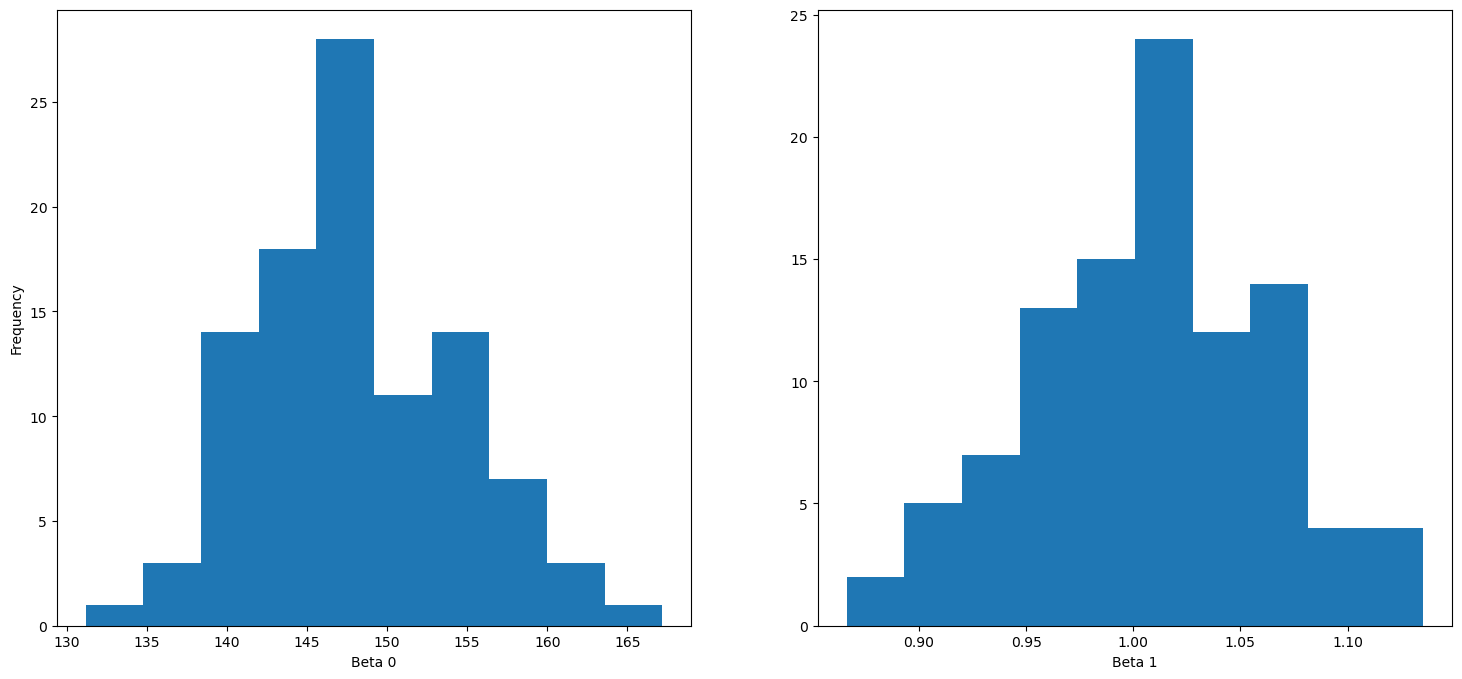

In [7]:
# Plot histograms of beta_0 and beta_1 using lists created above 
fig, ax = plt.subplots(1,2, figsize=(18,8))
ax[0].hist(beta0_list)
ax[1].hist(beta1_list)
ax[0].set_xlabel('Beta 0')
ax[1].set_xlabel('Beta 1')
ax[0].set_ylabel('Frequency');


# Exercise: Beta values for Data from Random Universe using Bootstrap

In [8]:
def RandomUniverse(df):
    df_bootstrap = df.sample(len(df), replace = True)
    return df_bootstrap

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from randomuniverse import RandomUniverse
%matplotlib inline


In [10]:
# Read the file "Advertising_csv"
df = pd.read_csv('Advertising_adj.csv')

# Take a quick look at the data
df.head()


,tv,sales
0,230.1,465.26
1,44.5,218.95
2,17.2,195.79
3,151.5,389.47
4,180.8,271.58


In [11]:
df.shape

(200, 2)

In [12]:
# Define a bootstrap function, which takes as input a dataframe 
# It must output a bootstrapped version of the input dataframe
def bootstrap(df):
    selectionIndex = np.random.randint(len(df), size=len(df))
    new_df = df.iloc[selectionIndex]
    return new_df


In [13]:
# Initialize two empty lists to store the beta values
beta0_list, beta1_list = [],[]

# Choose the number of "parallel" Universes to generate the new dataset
number_of_bootstraps = 500

# Loop through the number of bootstraps
for i in range(number_of_bootstraps):

    # Call the bootstrap function to get a bootstrapped version of the data
    df_new = bootstrap(df)

    # Find the mean of the predictor values i.e. tv
    xmean = df_new.tv.mean()

    # Find the mean of the response values i.e. sales
    ymean = df_new.sales.mean()

    #'X' is the predictor variable given by df_new.tv  
    X = df_new.tv 
    
    #'y' is the reponse variable given by df_new.sales 
    y = df_new.sales
    
    # Compute the analytical values of beta0 and beta1 using the 
    # equation given in the hints
    beta1 = np.sum((X-xmean) * (y-ymean)) / np.sum((X-xmean)**2)
    beta0 = ymean - beta1*xmean

    # Append the calculated values of beta1 and beta0 to the appropriate lists
    beta0_list.append(beta0)
    beta1_list.append(beta1)


In [14]:
### edTest(test_beta) ###

# Compute the mean of the beta values
beta0_mean = np.mean(beta0_list)
beta1_mean = np.mean(beta1_list)
print(beta0_mean)
print(beta1_mean)

148.55459617499508
0.9967847551778304


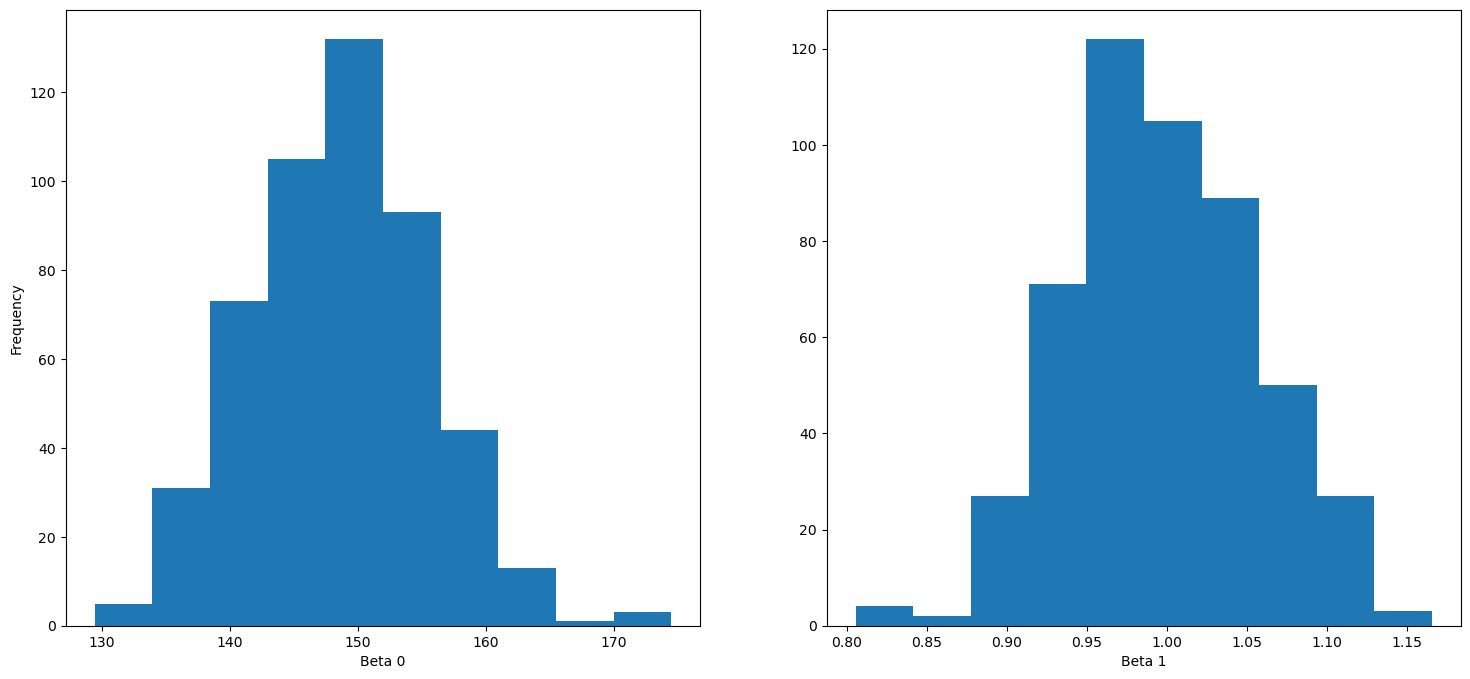

In [15]:
# Plot histograms of beta_0 and beta_1 using lists created above 

fig, ax = plt.subplots(1,2, figsize=(18,8))
ax[0].hist(beta0_list)
ax[1].hist(beta1_list)
ax[0].set_xlabel('Beta 0')
ax[1].set_xlabel('Beta 1')
ax[0].set_ylabel('Frequency')
plt.show();


In [16]:
# Helper code to visualise the similarity between the bootstrap
# function here & the RandomUniverse() function from last exercise
beta0_randUni, beta1_randUni = [],[]

parallelUniverses = 500

for i in range(parallelUniverses):
    df_new = RandomUniverse(df)
    
    xmean = df_new.tv.mean()
    ymean = df_new.sales.mean()

    # Using linear algebra result as discussed in lecture
    beta1 = (((df_new.tv - xmean)*(df_new.sales - ymean)).sum())/(((df_new.tv - xmean)**2).sum())
    beta0 = ymean - beta1*xmean

    beta0_randUni.append(beta0)
    beta1_randUni.append(beta1)


In [17]:
# Helper code to plot the bootstrapped beta values & the ones from random universe
def plotmulti(list1, list2):
    fig, axes = plt.subplots(1,2, figsize = (10,4), sharey = 'row')
    axes[0].hist(list1);
    axes[0].set_xlabel('Beta Distribution')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Bootstrap')
    axes[1].hist(list2);
    axes[1].set_xlabel('Beta Distribution')
    axes[1].set_title('Random Universe')
    plt.show();


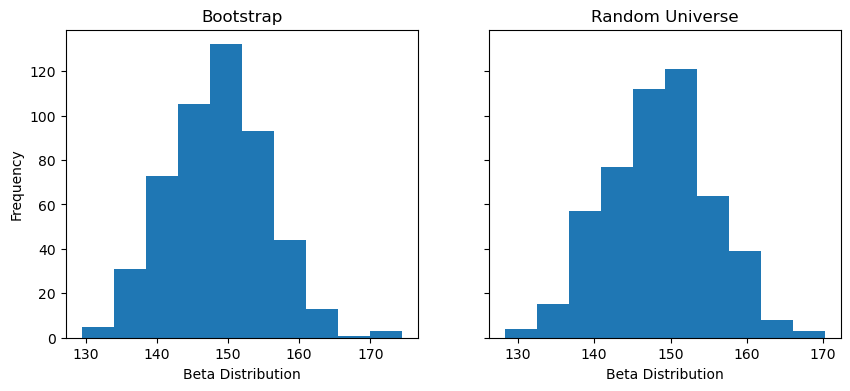

In [18]:
# Call the 'plotmulti' function above to compare the two histograms for beta0
plotmulti(beta0_list, beta0_randUni)


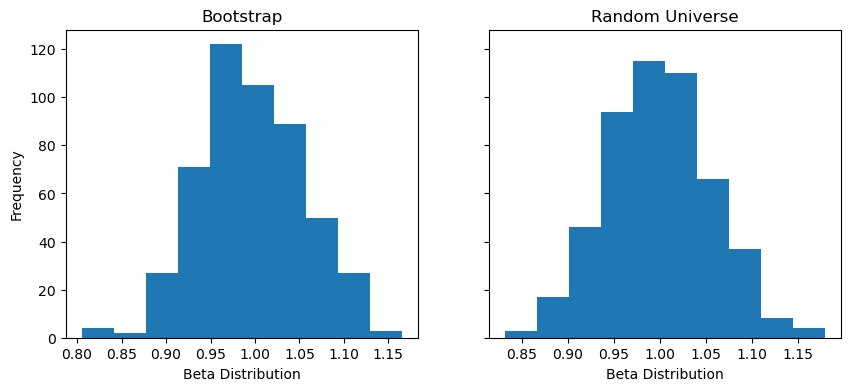

In [19]:
# Call the 'plotmulti' function above to compare the two histograms for beta1
plotmulti(beta1_list, beta1_randUni)


# Exercise: Confidence Interval for Beta value

In [20]:
def RandomUniverse(df):
    df_bootstrap = df.sample(200, replace = True)
    return df_bootstrap

In [21]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [22]:
# Read the 'Advertising_adj.csv' file
df = pd.read_csv('Advertising_adj.csv')

# Take a quick look at the data
df.head(3)


,tv,sales
0,230.1,465.26
1,44.5,218.95
2,17.2,195.79


In [23]:
df.shape

(200, 2)

In [24]:
# Use the bootstrap function defined in the previous exercise
def bootstrap(df):
    selectionIndex = np.random.randint(len(df), size = len(df))
    new_df = df.iloc[selectionIndex]
    return new_df


In [25]:
# Initialize empty lists to store beta values from 100 bootstraps 
# of the original data
beta0_list, beta1_list = [],[]

# Set the number of bootstraps
numberOfBootstraps = 100

# Loop over the number of bootstraps
for i in range(numberOfBootstraps):
    
    # Call the function bootstrap with the original dataframe
    df_new = bootstrap(df)
    
    # Compute the mean of the predictor i.e. the TV column
    xmean = df_new.tv.mean()

    # Compute the mean of the response i.e. the Sales column
    ymean = df_new.sales.mean()
    
    # Compute beta1 analytical using the equation in the hints
    beta1 = (((df_new.tv - xmean)*(df_new.sales - ymean)).sum())/(((df_new.tv - xmean)**2).sum())

    # Compute beta1 analytical using the equation in the hints
    beta0 = ymean - beta1*xmean
    
    # Append the beta values to their appropriate lists
    beta0_list.append(beta0)
    beta1_list.append(beta1)
    

In [26]:
### edTest(test_sort) ###

# Sort the two lists of beta values from the lowest value to highest 
beta0_list.sort();
beta1_list.sort();


In [29]:
### edTest(test_beta) ###

# Find the 95% percent confidence for beta0 interval using the 
# percentile function
# This has to include both the values i.e. lower end and upper end
beta0_CI = (np.percentile(beta0_list,2.5),np.percentile(beta0_list,97.5))

# Find the 95% percent confidence for beta1 interval using the 
# percentile function
# This has to include both the values i.e. lower end and upper end
beta1_CI = (np.percentile(beta1_list,2.5),np.percentile(beta1_list,97.5))

print(beta0_CI)
print(beta1_CI)

(138.00546657413392, 159.95750172427086)
(0.8915125038051013, 1.0916410730178447)


In [30]:
# Print the confidence interval of beta0 upto 3 decimal points
print(f'The beta0 confidence interval is {beta0_CI}')


The beta0 confidence interval is (138.00546657413392, 159.95750172427086)


In [31]:
# Print the confidence interval of beta1 upto 3 decimal points
print(f'The beta1 confidence interval is {beta1_CI}')


The beta1 confidence interval is (0.8915125038051013, 1.0916410730178447)


In [32]:
# Helper function to plot the histogram of beta values along with 
# the 95% confidence interval
def plot_simulation(simulation,confidence):
    plt.hist(simulation, bins = 30, label = fr'$\beta$ distribution', align = 'left', density = True)
    plt.axvline(confidence[1], 0, 1, color = 'r', label = 'Right Interval')
    plt.axvline(confidence[0], 0, 1, color = 'red', label = 'Left Interval')
    plt.xlabel(fr'$\beta$ value')
    plt.ylabel('Frequency')
    plt.title('95% Confidence Interval')
    plt.legend(frameon = False, loc = 'upper right')


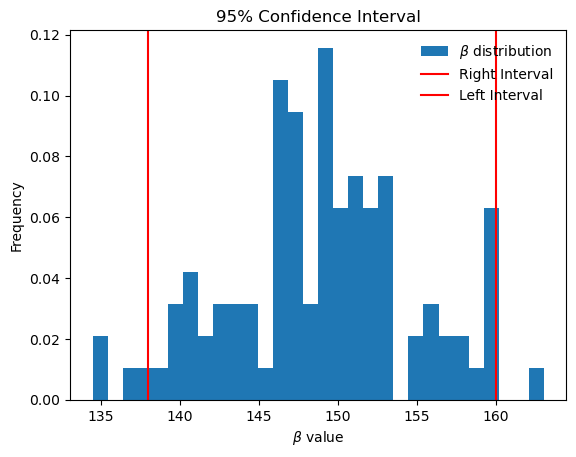

In [40]:
# Call the function plot_simulation to get the histogram for beta 0
# with the confidence interval
plot_simulation(beta0_list, beta0_CI)


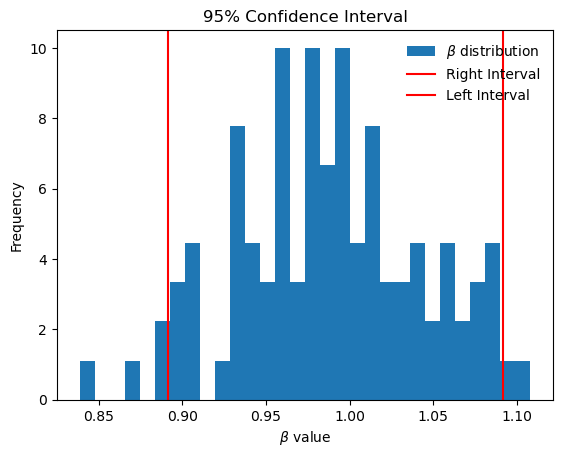

In [41]:
# Call the function plot_simulation to get the histogram for beta 1
# with the confidence interval
plot_simulation(beta1_list, beta1_CI)


# Exercise: Hypothesis Testing

In [42]:
# Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [46]:
# Read the file "Advertising.csv" as a dataframe

df = pd.read_csv('Advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [47]:
df.shape

(200, 4)

In [48]:
# Normalize using MinMaxScaler
x_col = ["TV","Radio","Newspaper"]
scaler = MinMaxScaler()
df[x_col] = scaler.fit_transform(df[x_col])

In [49]:
# Select a subdataframe of predictors

X = df.drop(['Sales'],axis=1)

# Select the response variable

y = df['Sales']

In [50]:
#Fit a linear regression model

lreg = LinearRegression()

lreg.fit(X, y)

LinearRegression()

In [51]:
coef_dict = dict(zip(df.columns[:-1], np.transpose(lreg.coef_)))
predictors,coefficients = list(zip(*sorted(coef_dict.items(),key=lambda x: x[1])))

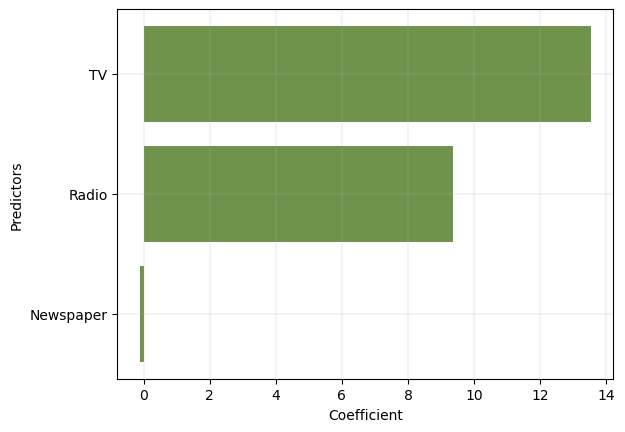

In [52]:
# Use the helper code below to visualise your coefficients

fig, ax = plt.subplots()
ax.barh(predictors,coefficients, align='center',color="#336600",alpha=0.7)
ax.grid(linewidth=0.2)
ax.set_xlabel("Coefficient")
ax.set_ylabel("Predictors")
plt.show()

In [53]:
# Helper function
# t statistic calculator
def get_t(arr):
    means = np.abs(arr.mean(axis=0))
    stds = arr.std(axis=0)
    return np.divide(means,stds)#,where=stds!=0)

In [54]:
# We now bootstrap for numboot times to find the distribution for the coefficients
coef_dist = []
numboot = 1000
for i in range(numboot):
    # This is another way of making a bootstrap using df.sample method. 
    # Take frac=1 and replace=True to get a bootstrap.
    df_new = df.sample(frac=1,replace=True)
    
    X = df_new.drop('Sales',axis=1)
    y = df_new['Sales']
    
    # Fit a linear model
    lreg = LinearRegression()
    lreg.fit(X, y)
    coef_dist.append(lreg.coef_)

coef_dist = np.array(coef_dist)

In [55]:
# We use the helper function from above to find the T-test values

tt = get_t(coef_dist)
n = df.shape[0]

In [56]:
tt_dict = dict(zip(df.columns[:-1], tt))
predictors, tvalues = list(zip(*sorted(tt_dict.items(),key=lambda x:x[1])))

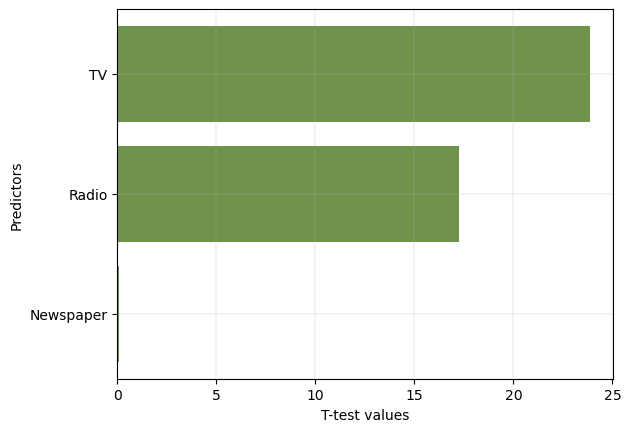

In [57]:
# Use the helper code below to visualise your coefficients
fig, ax = plt.subplots()
ax.barh(predictors,tvalues, align='center',color="#336600",alpha=0.7)
ax.grid(linewidth=0.2)
ax.set_xlabel("T-test values")
ax.set_ylabel("Predictors")
plt.show()

In [58]:
### edTest(test_conf) ###
# We now go from t-test values to p values using scipy.stats T-distribution function

pval = stats.t.sf(tt, n-1)*2

# here we use sf i.e 'Survival function' which is 1 - CDF of the t distribution.
# where CDF is the Cumulative Distribution Function 
# We also multiply by two because its a two tailed test.
# Please refer to lecture notes for more information

# Since p values are in reversed order, we find the 'confidence' which is 1-p

conf = 1-pval

In [59]:
conf_dict = dict(zip(df.columns[:-1], conf))
predictors, confs = list(zip(*sorted(conf_dict.items(),key=lambda x:x[1])))

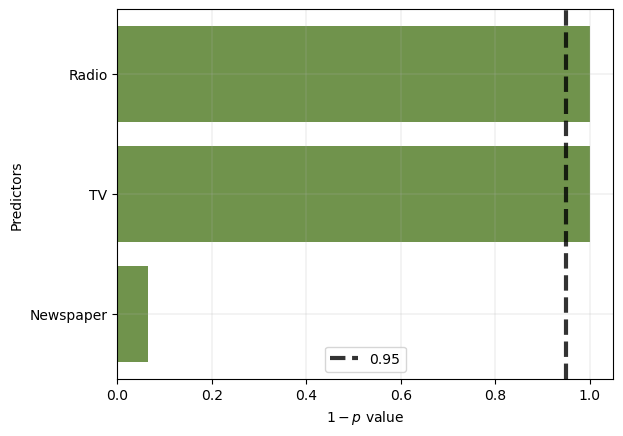

In [60]:
# Use the helper code below to visualise your coefficients
fig, ax = plt.subplots()

ax.barh(predictors,confs, align='center',color="#336600",alpha=0.7)
ax.grid(linewidth=0.2)
ax.axvline(x=0.95,linewidth=3,linestyle='--', color = 'black',alpha=0.8,label = '0.95')
ax.set_xlabel("$1-p$ value")
ax.set_ylabel("Predictors")
ax.legend()
plt.show()

# Exericse: Prediction Confidence Interval

In [130]:
# Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

In [131]:
# Read the `Advertising.csv` dataframe

df = pd.read_csv('Advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [132]:
df.shape

(200, 4)

In [133]:
# This helper function computes the variance of the error term 

def error_func(y,y_p):
    n = len(y)
    return np.sqrt(np.sum((y-y_p)**2/(n-2)))

In [134]:
# select the number of bootstraps 

numboot = 1000

# Set the budget amount of $1000. We have used a 2d list to facilitate model prediction (sklearn.LinearRegression requires input as a 2d array)
budget = [[1000]]

# Define an empty list that will store sales predictions for each bootstrap
sales_dist = []

In [135]:
# Running through each bootstrap, we fit a model, make predictions and compute sales which is appended to the list defined above

for i in range(numboot):
    # Bootstrap using df.sample method.
    df_new = df.sample(frac=1, replace=True)
    x = df_new[['TV']].values
    y = df_new['Sales'].values
    linreg = LinearRegression()
    linreg.fit(x,y)
    prediction = linreg.predict(budget)
    y_pred = linreg.predict(x) 
    error = np.random.normal(0,error_func(y,y_pred))
    # The final sales prediction is the sum of the model prediction and the error term
    sales = np.sum(prediction+error)
    sales_dist.append(np.float64(sales))

In [136]:
### edTest(test_sales) ###
# We sort the list containing sales predictions in ascending values 

sales_dist.sort()

# find the 95% confidence interval using np.percentile function at 2.5% and 97.5%

sales_CI = (np.percentile(sales_dist,2.5),np.percentile(sales_dist, 97.5))

In [137]:
# Use this helper function to plot the histogram of beta values along with the 95% confidence interval

def plot_simulation(simulation,confidence):
    plt.hist(simulation, bins = 30, label = 'beta distribution', align = 'left', density = True,edgecolor='k')
    plt.axvline(confidence[1], 0, 1, color = 'r', label = 'Right Interval')
    plt.axvline(confidence[0], 0, 1, color = 'red', label = 'Left Interval')
    plt.xlabel('Beta value')
    plt.ylabel('Frequency')
    plt.legend(frameon = False, loc = 'upper right')

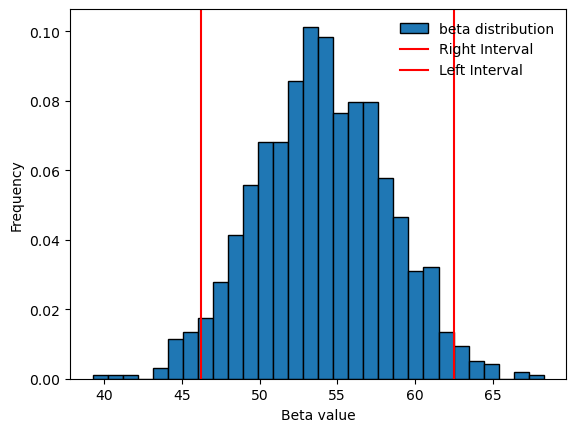

In [138]:
# call the function above with the computed sales distribution and the confidence intervals from earlier

plot_simulation(sales_dist,sales_CI)

In [139]:
# Print the computed values

print(f"With a TV advertising budget of ${budget[0][0]},")
print(f"we can expect an increase of sales anywhere between {sales_CI[0]:0.2f} to {sales_CI[1]:.2f}\
 with a 95% confidence interval")

With a TV advertising budget of $1000,
we can expect an increase of sales anywhere between 46.23 to 62.52 with a 95% confidence interval


In [140]:
# Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

In [141]:
# Read the `Advertising.csv` dataframe

df = pd.read_csv('Advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [142]:
df.shape

(200, 4)

In [143]:
# This helper function computes the variance of the error term 

def error_func(y,y_p):
    n = len(y)
    return np.sqrt(np.sum((y-y_p)**2/(n-2)))

In [144]:
# select the number of bootstraps 

numboot = 1000

# Set the budget amount of $1000. We have used a 2d list to facilitate model prediction (sklearn.LinearRegression requires input as a 2d array)
budget = [[1000,0,0]]

# Define an empty list that will store sales predictions for each bootstrap
sales_dist = []

In [145]:
# Running through each bootstrap, we fit a model, make predictions and compute sales which is appended to the list defined above

for i in range(numboot):
    # Bootstrap using df.sample method.
    df_new = df.sample(frac=1, replace=True)
    x = df_new[['TV','Radio','Newspaper']].values
    y = df_new['Sales'].values
    linreg = LinearRegression()
    linreg.fit(x,y)
    prediction = linreg.predict(budget)
    y_pred = linreg.predict(x) 
    error = np.random.normal(0,error_func(y,y_pred))
    # The final sales prediction is the sum of the model prediction and the error term
    sales = np.sum(prediction+error)
    sales_dist.append(np.float64(sales))

In [146]:
### edTest(test_sales) ###
# We sort the list containing sales predictions in ascending values 

sales_dist.sort()

# find the 95% confidence interval using np.percentile function at 2.5% and 97.5%

sales_CI = (np.percentile(sales_dist,2.5),np.percentile(sales_dist, 97.5))

In [147]:
# Use this helper function to plot the histogram of beta values along with the 95% confidence interval

def plot_simulation(simulation,confidence):
    plt.hist(simulation, bins = 30, label = 'beta distribution', align = 'left', density = True,edgecolor='k')
    plt.axvline(confidence[1], 0, 1, color = 'r', label = 'Right Interval')
    plt.axvline(confidence[0], 0, 1, color = 'red', label = 'Left Interval')
    plt.xlabel('Beta value')
    plt.ylabel('Frequency')
    plt.legend(frameon = False, loc = 'upper right')

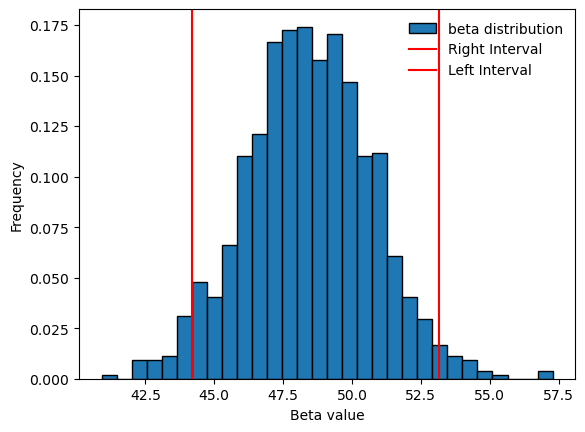

In [148]:
# call the function above with the computed sales distribution and the confidence intervals from earlier

plot_simulation(sales_dist,sales_CI)

In [150]:
# Print the computed values

print(f"With an advertising budget of ${budget[0:2][0:2]},")
print(f"we can expect an increase of sales anywhere between {sales_CI[0]:0.2f} to {sales_CI[1]:.2f}\
 with a 95% confidence interval")

With an advertising budget of $[[1000, 0, 0]],
we can expect an increase of sales anywhere between 44.20 to 53.14 with a 95% confidence interval
